<font size="6"><center><b>Predicting Credit Card Default</b></center></font><br>
<font size="4"><center><b>Part 1, Exploratory Data Analysis, Data Cleansing and Preparation for Modeling</b><br><br>
<font size="4"><center><b>Melissa Perez, September 25, 2018</b></center></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [2]:
# matplotlib styles available for use
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [3]:
credit = pd.read_csv('default of credit card clients.csv', header =1)

## Basic Data Characteristics

In [4]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
credit.rename(columns={"LIMIT_BAL":"LimitBalance", "SEX":"Gender", 
                       "EDUCATION":"Education", "MARRIAGE":"MaritalStatus", "AGE":"Age", 
                       "PAY_0":"PastPay-1", "PAY_2":"PastPay-2", "PAY_3":"PastPay-3", 
                       "PAY_4":"PastPay-4", "PAY_5":"PastPay-5", "PAY_6":"PastPay-6",
                       "PAY_AMT1":"PayAmt-1", "PAY_AMT2":"PayAmt-2", "PAY_AMT3":"PayAmt-3", 
                       "PAY_AMT4":"PayAmt-4", "PAY_AMT5":"PayAmt-5", "PAY_AMT6":"PayAmt-6",
                       "BILL_AMT1":"BillAmt-1", "BILL_AMT2":"BillAmt-2", "BILL_AMT3":"BillAmt-3", 
                       "BILL_AMT4":"BillAmt-4", "BILL_AMT5":"BillAmt-5", "BILL_AMT6":"BillAmt-6",
                       "default payment next month":"DefaultFl"}, inplace=True)

In [6]:
credit.head()

,ID,LimitBalance,Gender,Education,MaritalStatus,Age,PastPay-1,PastPay-2,PastPay-3,PastPay-4,PastPay-5,PastPay-6,BillAmt-1,BillAmt-2,BillAmt-3,BillAmt-4,BillAmt-5,BillAmt-6,PayAmt-1,PayAmt-2,PayAmt-3,PayAmt-4,PayAmt-5,PayAmt-6,DefaultFl
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
credit.tail()

,ID,LimitBalance,Gender,Education,MaritalStatus,Age,PastPay-1,PastPay-2,PastPay-3,PastPay-4,PastPay-5,PastPay-6,BillAmt-1,BillAmt-2,BillAmt-3,BillAmt-4,BillAmt-5,BillAmt-6,PayAmt-1,PayAmt-2,PayAmt-3,PayAmt-4,PayAmt-5,PayAmt-6,DefaultFl
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.00,15000.50,8660.40,1.00,7500.75,15000.50,22500.25,30000.00
LimitBalance,30000.00,167484.32,129747.66,10000.00,50000.00,140000.00,240000.00,1000000.00
Gender,30000.00,1.60,0.49,1.00,1.00,2.00,2.00,2.00
Education,30000.00,1.85,0.79,0.00,1.00,2.00,2.00,6.00
MaritalStatus,30000.00,1.55,0.52,0.00,1.00,2.00,2.00,3.00
Age,30000.00,35.49,9.22,21.00,28.00,34.00,41.00,79.00
PastPay-1,30000.00,-0.02,1.12,-2.00,-1.00,0.00,0.00,8.00
PastPay-2,30000.00,-0.13,1.20,-2.00,-1.00,0.00,0.00,8.00
PastPay-3,30000.00,-0.17,1.20,-2.00,-1.00,0.00,0.00,8.00
PastPay-4,30000.00,-0.22,1.17,-2.00,-1.00,0.00,0.00,8.00


In [9]:
# Dimensionality of the Credit dataframe
credit.shape

(30000, 25)

In [10]:
# How many of the observations for each field have a NULL value
credit.isnull().sum()

ID               0
LimitBalance     0
Gender           0
Education        0
MaritalStatus    0
Age              0
PastPay-1        0
PastPay-2        0
PastPay-3        0
PastPay-4        0
PastPay-5        0
PastPay-6        0
BillAmt-1        0
BillAmt-2        0
BillAmt-3        0
BillAmt-4        0
BillAmt-5        0
BillAmt-6        0
PayAmt-1         0
PayAmt-2         0
PayAmt-3         0
PayAmt-4         0
PayAmt-5         0
PayAmt-6         0
DefaultFl        0
dtype: int64

## Check for Outliers

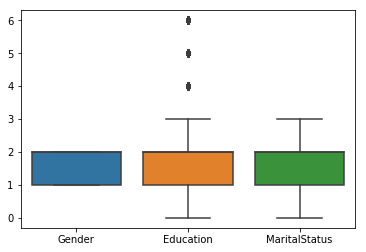

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

box_df = credit[['Gender','Education','MaritalStatus']]
sns.boxplot(data=box_df)

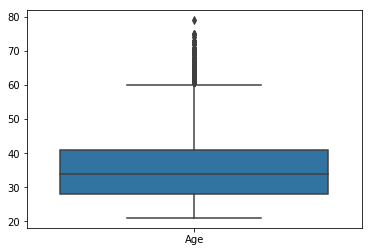

In [12]:
box_df = credit[['Age']]
sns.boxplot(data=box_df)

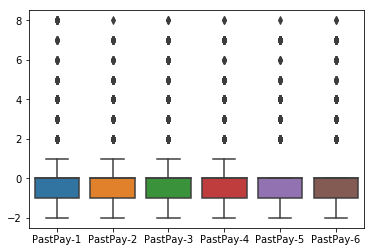

In [13]:
box_df = credit[['PastPay-1','PastPay-2','PastPay-3','PastPay-4','PastPay-5','PastPay-6']]
sns.boxplot(data=box_df)

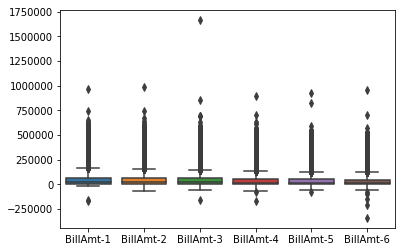

In [14]:
box_df = credit[['BillAmt-1','BillAmt-2','BillAmt-3','BillAmt-4','BillAmt-5','BillAmt-6']]
sns.boxplot(data=box_df)

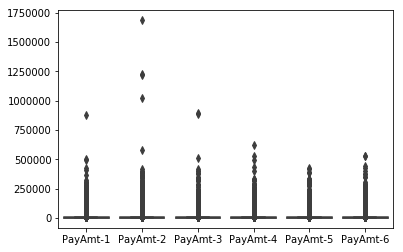

In [15]:
box_df = credit[['PayAmt-1','PayAmt-2','PayAmt-3','PayAmt-4','PayAmt-5','PayAmt-6']]
sns.boxplot(data=box_df)

## Categorical Data Validation and Cleaning

#### Note: Should have set the ID column to be the dataframe index.  I will hold off on doing this as I don't know the ramifications on operations further down and will leave that as a todo for later.

##### Gender (1 = male; 2 = female)

In [16]:
credit.Gender.value_counts().sort_index()

1    11888
2    18112
Name: Gender, dtype: int64

##### Education (1 = graduate school; 2 = university; 3 = high school; 0,4,5,6 = others)

In [17]:
credit.Education.value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: Education, dtype: int64

##### Education - group 'other' entries

In [18]:
filter_others = (credit.Education == 0) | (credit.Education == 5) | (credit.Education == 6)
credit.loc[filter_others, 'Education'] = 4
credit.Education.value_counts().sort_index()

1    10585
2    14030
3     4917
4      468
Name: Education, dtype: int64

##### Marital Status (1 = married; 2 = single; 3 = divorce, 0 = others)

In [19]:
credit.MaritalStatus.value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MaritalStatus, dtype: int64

### Consider Feature DataTypes

In [20]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID               30000 non-null int64
LimitBalance     30000 non-null int64
Gender           30000 non-null int64
Education        30000 non-null int64
MaritalStatus    30000 non-null int64
Age              30000 non-null int64
PastPay-1        30000 non-null int64
PastPay-2        30000 non-null int64
PastPay-3        30000 non-null int64
PastPay-4        30000 non-null int64
PastPay-5        30000 non-null int64
PastPay-6        30000 non-null int64
BillAmt-1        30000 non-null int64
BillAmt-2        30000 non-null int64
BillAmt-3        30000 non-null int64
BillAmt-4        30000 non-null int64
BillAmt-5        30000 non-null int64
BillAmt-6        30000 non-null int64
PayAmt-1         30000 non-null int64
PayAmt-2         30000 non-null int64
PayAmt-3         30000 non-null int64
PayAmt-4         30000 non-null int64
PayAmt-5         30000 non-null int64
PayAmt-6         

#### Modify numerical to categorical datatype for Gender, Education, and MaritalStatus
this is done to improve memory usage

In [21]:
credit['Gender'] = credit['Gender'].astype('category',copy=False)
credit['Education'] = credit['Education'].astype('category',copy=False)
credit['MaritalStatus'] = credit['MaritalStatus'].astype('category',copy=False)

In [22]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID               30000 non-null int64
LimitBalance     30000 non-null int64
Gender           30000 non-null category
Education        30000 non-null category
MaritalStatus    30000 non-null category
Age              30000 non-null int64
PastPay-1        30000 non-null int64
PastPay-2        30000 non-null int64
PastPay-3        30000 non-null int64
PastPay-4        30000 non-null int64
PastPay-5        30000 non-null int64
PastPay-6        30000 non-null int64
BillAmt-1        30000 non-null int64
BillAmt-2        30000 non-null int64
BillAmt-3        30000 non-null int64
BillAmt-4        30000 non-null int64
BillAmt-5        30000 non-null int64
BillAmt-6        30000 non-null int64
PayAmt-1         30000 non-null int64
PayAmt-2         30000 non-null int64
PayAmt-3         30000 non-null int64
PayAmt-4         30000 non-null int64
PayAmt-5         30000 non-null int64
PayAmt-6

# Exploratory Data Analysis
## Univariate Analysis

Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable. Since it's a single variable it doesn’t deal with causes or relationships.  The main purpose of univariate analysis is to describe the data and find patterns that exist within it

You can think of the variable as a category that your data falls into. One example of a variable in univariate analysis might be "age". Another might be "height". Univariate analysis would not look at these two variables at the same time, nor would it look at the relationship between them.  

Some ways you can describe patterns found in univariate data include looking at mean, mode, median, range, variance, maximum, minimum, quartiles, and standard deviation. Additionally, some ways you may display univariate data include frequency distribution tables, bar charts, histograms, frequency polygons, and pie charts.

### Customers by Gender

In [23]:
df = pd.DataFrame(credit.groupby('Gender')['Gender'].count())
df.index = df.index.map(lambda number: 'Male' if number == 1 else 'Female')
df.columns = ['Count']
df

# Handle using a Series
# s = credit.groupby('Gender')['Gender'].count()
# s.index = s.index.map(lambda number: 'Male' if number == 1 else 'Female')
# s.name = "Credit Customers by Gender Count"
# s

# Calculate Percentage column and add to dataframe
df['Percentage'] = 100 * df['Count']  / df['Count'].sum()
print (df)

        Count  Percentage
Gender                   
Male    11888       39.63
Female  18112       60.37


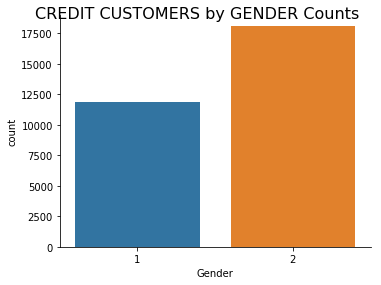

In [24]:
# Use seaborn to plot the count by Gender
import seaborn as sns 
import matplotlib.pyplot as plt
fg = sns.factorplot('Gender', data=credit, kind='count', aspect=1.3, size=4)
fg.set_xlabels('Gender')
fg.fig.suptitle('CREDIT CUSTOMERS by GENDER Counts', fontsize=16) 
plt.show()

### Customers by Age

In [25]:
df = pd.DataFrame(credit.groupby('Age')['Age'].count())
df.columns = ['Count']
df

# Calculate Percentage column and add to dataframe
df['Percentage'] = 100 * df['Count']  / df['Count'].sum()
print (df)

     Count  Percentage
Age                   
21      67        0.22
22     560        1.87
23     931        3.10
24    1127        3.76
25    1186        3.95
26    1256        4.19
27    1477        4.92
28    1409        4.70
29    1605        5.35
30    1395        4.65
31    1217        4.06
32    1158        3.86
33    1146        3.82
34    1162        3.87
35    1113        3.71
36    1108        3.69
37    1041        3.47
38     944        3.15
39     954        3.18
40     870        2.90
41     824        2.75
42     794        2.65
43     670        2.23
44     700        2.33
45     617        2.06
46     570        1.90
47     501        1.67
48     466        1.55
49     452        1.51
50     411        1.37
51     340        1.13
52     304        1.01
53     325        1.08
54     247        0.82
55     209        0.70
56     178        0.59
57     122        0.41
58     122        0.41
59      83        0.28
60      67        0.22
61      56        0.19
62      44 

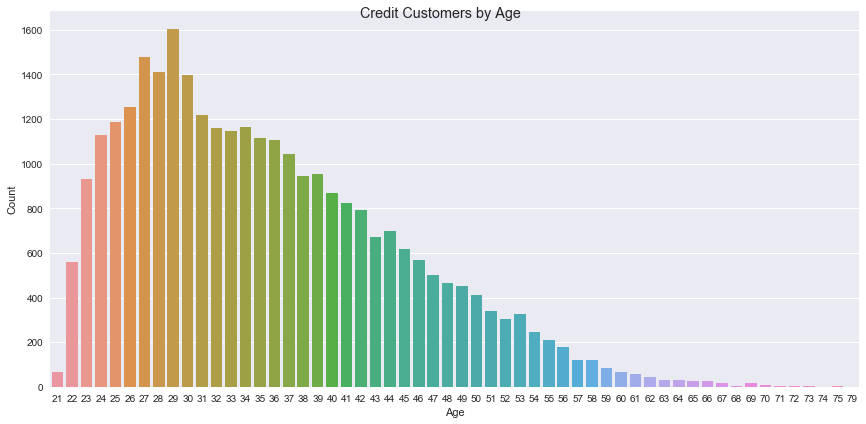

In [26]:
# Use seaborn to plot the count by age
sns.set(font_scale=1)
fg = sns.factorplot('Age', data=credit, kind='count', aspect=2.0, legend=True, size=6)
fg.set_xlabels('Age')
fg.set_ylabels('Count')
fg.fig.suptitle('Credit Customers by Age')
# fg.fig.get_axes()[0].legend(loc='lower left')
plt.show()

### Credit Customers by Education Level

In [27]:
# Customers by Education  
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

def interpret_education(number):
    if number == 1:
        return 'Graduate School'
    elif number == 2:
        return 'University'
    elif number == 3:
        return 'High School'
    else:
        return 'Others'
    
df = pd.DataFrame(credit['Education'].apply(interpret_education))
dfGrouped = pd.DataFrame(df.groupby('Education')['Education'].count())
dfGrouped.columns = ['Count']

# Calculate Percentage column and add to dataframe
dfGrouped['Percentage'] = 100 * dfGrouped['Count']  / dfGrouped['Count'].sum()
print (dfGrouped)

                 Count  Percentage
Education                         
Graduate School  10585       35.28
University       14030       46.77
High School       4917       16.39
Others             468        1.56


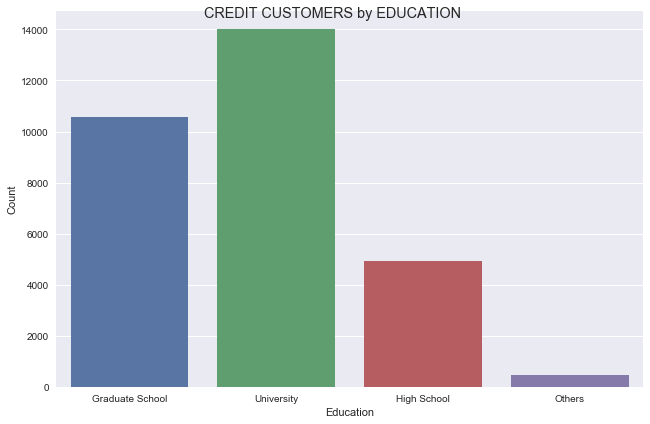

In [28]:
# Use seaborn to plot the count by education
df = pd.DataFrame(credit['Education'].apply(interpret_education))
fg = sns.factorplot('Education', data=df, kind='count', aspect=1.5, size=6)
fg.set_xlabels('Education')
fg.set_ylabels('Count')

fg.fig.suptitle('CREDIT CUSTOMERS by EDUCATION') 
plt.show()

### Credit Customers by Marital Status

In [29]:
# Customers by Marital Status  
# X4: Marital status (1 = married; 2 = single; 3 = divorce; 0=others).

def interpret_marital(number):
    if number == 0:
        return 'Others'
    elif number == 1:
        return 'Married'
    elif number == 2:
        return 'Single'
    elif number == 3:
        return 'Divorce'

df = pd.DataFrame(credit.groupby('MaritalStatus')['MaritalStatus'].count())
df.index = df.index.map(interpret_marital)
# df.index.name = 'MaritalStatus' - not necessary after original column name changed
df.columns = ['Count']

# Calculate Percentage column and add to dataframe
df['Percentage'] = 100 * df['Count']  / df['Count'].sum()
print (df)

               Count  Percentage
MaritalStatus                   
Others            54        0.18
Married        13659       45.53
Single         15964       53.21
Divorce          323        1.08


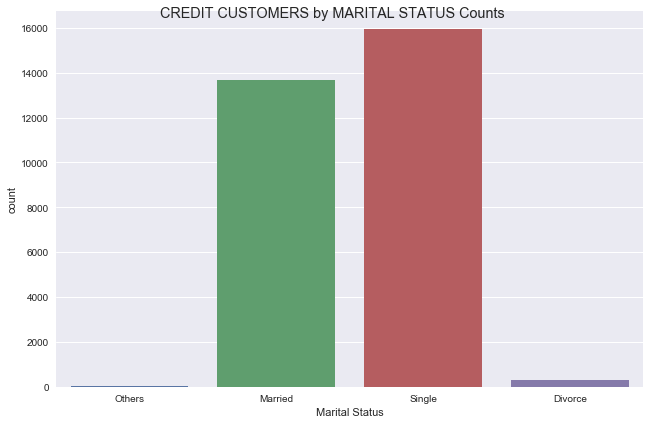

In [30]:
# Use seaborn to plot the count by marital status
df = pd.DataFrame(credit['MaritalStatus'].apply(interpret_marital))

fg = sns.factorplot('MaritalStatus', data=df, kind='count', size=6, aspect=1.5)
fg.set_xlabels('Marital Status')
fg.fig.suptitle('CREDIT CUSTOMERS by MARITAL STATUS Counts') 
plt.show()

### Histogram: Credit Given

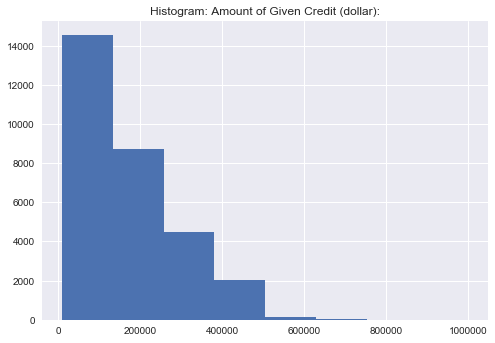

In [31]:
# histogram using the .hist method of matplotlib
plt.style.use('seaborn')
plt.hist(credit['LimitBalance'], bins=8)
plt.title('Histogram: Amount of Given Credit (dollar):')
plt.show()

### Line Chart: Credit Given

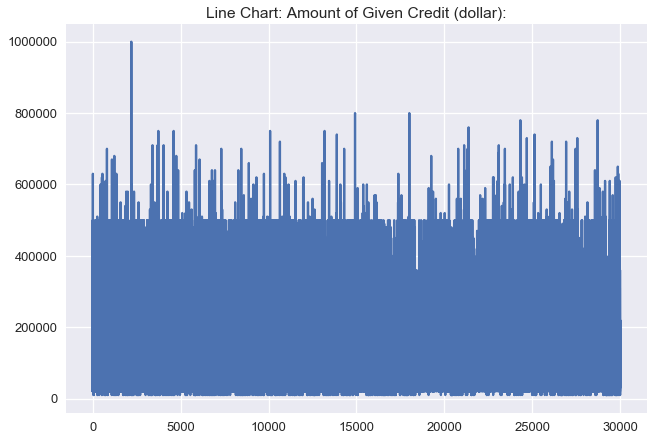

In [32]:
# line plot for the same variable we studied previously
plt.style.use('seaborn-talk')
plt.plot(credit['LimitBalance'])
plt.title('Line Chart: Amount of Given Credit (dollar):')
plt.show()

## Multivariate Data Analysis

Multivariate analysis is the analysis of three or more variables.  There are many ways to perform multivariate analysis depending on your goals.  Some of these methods include Additive Tree, Canonical Correlation Analysis, Cluster Analysis, Correspondence Analysis / Multiple Correspondence Analysis, Factor Analysis, Generalized Procrustean Analysis, MANOVA, Multidimensional Scaling, Multiple Regression Analysis, Partial Least Square Regression, Principal Component Analysis / Regression / PARAFAC,  and Redundancy Analysis.


### Grouping by Gender and Age

In [33]:
# Number of men and women in each of the age class
df = pd.DataFrame(credit.groupby(['Gender', 'Age'])['Gender'].count())
df.columns = ['Count']
df.reset_index(inplace=True)  
df['Gender'] = df['Gender'].map(lambda number: 'Male' if number == 1 else 'Female')
df

,Gender,Age,Count
0,Male,21,21
1,Male,22,139
2,Male,23,260
3,Male,24,355
4,Male,25,390
5,Male,26,464
6,Male,27,529
7,Male,28,506
8,Male,29,617
9,Male,30,561


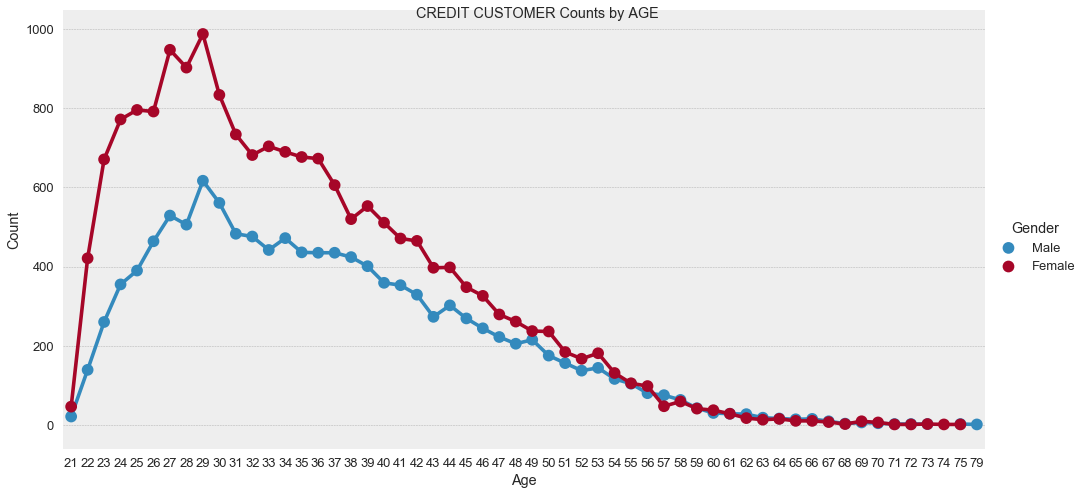

In [34]:
# Use saeborn to group by Sex and Age
df = pd.DataFrame(credit.groupby(['Gender', 'Age'])['Gender'].count())
df.columns = ['Count']
df.reset_index(inplace=True)  
df['Gender'] = df['Gender'].map(lambda number: 'Male' if number == 1 else 'Female')
#df = df.loc[df['Gender'] == 'Male']

plt.style.use('bmh')
fg = sns.factorplot(data=df, x='Age', y='Count', hue ='Gender', size=7, aspect=2.0)
fg.set_xlabels('Age')
fg.fig.suptitle('CREDIT CUSTOMER Counts by AGE') 
plt.show()

### Grouping by Gender and Marital Status

In [35]:
# Number of men and women by marital status
def interpret_marital(number):
    if number == 0:
        return 'Others'
    elif number == 1:
        return 'Married'
    elif number == 2:
        return 'Single'
    elif number == 3:
        return 'Divorce'
    
df = pd.DataFrame(credit.groupby(['Gender', 'MaritalStatus'])['Gender'].count())
df.columns = ['Count']
df.reset_index(inplace=True)  
df['Gender'] = df['Gender'].map(lambda number: 'Male' if number == 1 else 'Female')
df['MaritalStatus'] = df['MaritalStatus'].map(interpret_marital)

# Calculate Percentage column and add to dataframe
df['Percentage'] = 100 * df['Count']  / df['Count'].sum()
print (df)

   Gender MaritalStatus  Count  Percentage
0    Male        Others     14        0.05
1    Male       Married   5190       17.30
2    Male        Single   6553       21.84
3    Male       Divorce    131        0.44
4  Female        Others     40        0.13
5  Female       Married   8469       28.23
6  Female        Single   9411       31.37
7  Female       Divorce    192        0.64


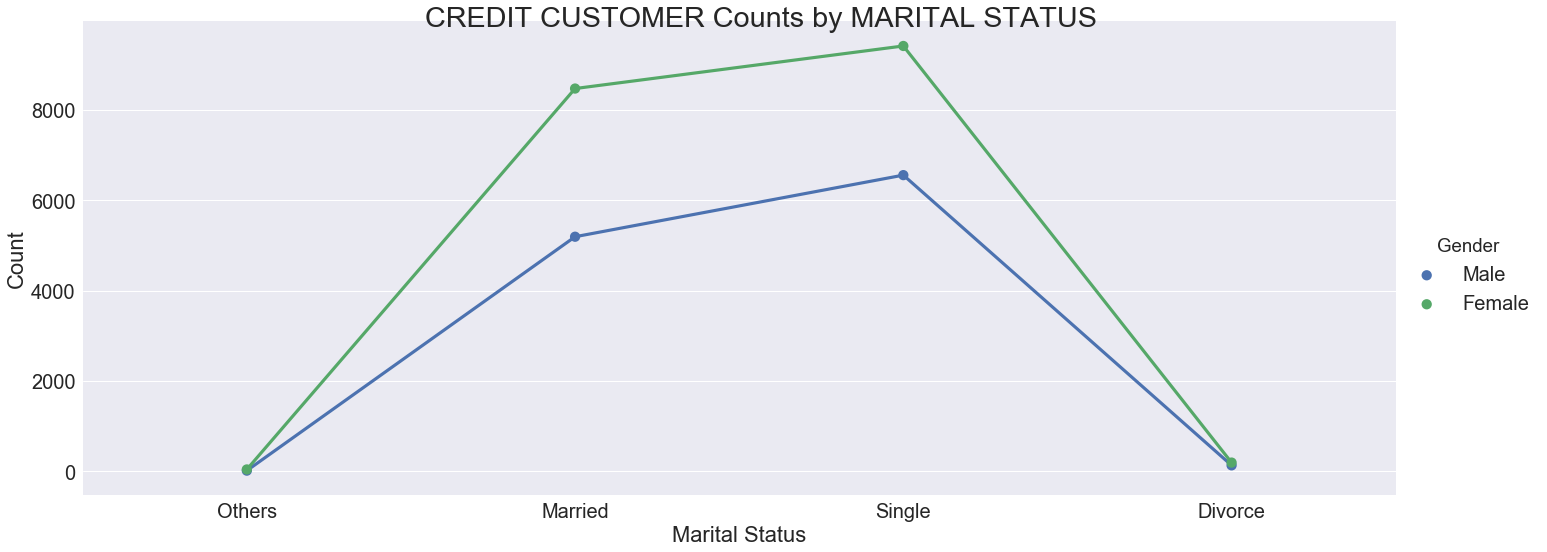

In [36]:
# Use saeborn to group by Sex and Marital Status
df = pd.DataFrame(credit.groupby(['Gender', 'MaritalStatus'])['Gender'].count())
df.columns = ['Count']
df.reset_index(inplace=True)  
df['Gender'] = df['Gender'].map(lambda number: 'Male' if number == 1 else 'Female')
df['MaritalStatus'] = df['MaritalStatus'].map(interpret_marital)
df

sns.set(font_scale=2)
fg = sns.factorplot(data=df, legend=True, x='MaritalStatus', y='Count', hue='Gender', size=8, aspect=2.5)
fg.set_xlabels('Marital Status')
fg.fig.suptitle('CREDIT CUSTOMER Counts by MARITAL STATUS') 
plt.show()

### Grouping by Gender and Marital Status to Calculate Percentages

#### Credit Customer Men by Marital Status

In [37]:
# Number of men by marital status
def interpret_marital(number):
    if number == 0:
        return 'Others'
    elif number == 1:
        return 'Married'
    elif number == 2:
        return 'Single'
    elif number == 3:
        return 'Divorce'
    
df = credit[credit['Gender'] == 1] 
df = pd.DataFrame(df.groupby(['Gender', 'MaritalStatus'])['Gender'].count())
df.columns = ['Count']
df.reset_index(inplace=True)  
df['Gender'] = df['Gender'].map(lambda number: 'Male' if number == 1 else 'Female')
df['MaritalStatus'] = df['MaritalStatus'].map(interpret_marital)

# Calculate Percentage column and add to dataframe
df['Percentage'] = 100 * df['Count']  / df['Count'].sum()
print (df)

  Gender MaritalStatus  Count  Percentage
0   Male        Others     14        0.12
1   Male       Married   5190       43.66
2   Male        Single   6553       55.12
3   Male       Divorce    131        1.10


#### Credit Customer Women by Marital Status

In [38]:
# Number of women by marital status
def interpret_marital(number):
    if number == 0:
        return 'Others'
    elif number == 1:
        return 'Married'
    elif number == 2:
        return 'Single'
    elif number == 3:
        return 'Divorce'
    
df = credit[credit['Gender'] == 2] 
df = pd.DataFrame(df.groupby(['Gender', 'MaritalStatus'])['Gender'].count())
df.columns = ['Count']
df.reset_index(inplace=True)  
df['Gender'] = df['Gender'].map(lambda number: 'Male' if number == 1 else 'Female')
df['MaritalStatus'] = df['MaritalStatus'].map(interpret_marital)

# Calculate Percentage column and add to dataframe
df['Percentage'] = 100 * df['Count']  / df['Count'].sum()
print (df)

   Gender MaritalStatus  Count  Percentage
0  Female        Others     40        0.22
1  Female       Married   8469       46.76
2  Female        Single   9411       51.96
3  Female       Divorce    192        1.06


### Grouping by Gender and Education

In [39]:
# Number of men and women by education
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

def interpret_education(number):
    if number == 1:
        return 'Graduate School'
    elif number == 2:
        return 'University'
    elif number == 3:
        return 'High School'
    else:
        return 'Others'
    
df = pd.DataFrame(credit.groupby(['Gender', 'Education'])['Gender'].count())
df.columns = ['Count']
df.reset_index(inplace=True)  
df['Gender'] = df['Gender'].map(lambda number: 'Male' if number == 1 else 'Female')
df['Education'] = df['Education'].map(interpret_education)
dfGrouped = pd.DataFrame(df.groupby(['Gender', 'Education'])['Count'].sum())
dfGrouped.columns = ['Count']

# Calculate Percentage column and add to dataframe
dfGrouped['Percentage'] = 100 * dfGrouped['Count']  / dfGrouped['Count'].sum()
print (dfGrouped)

                        Count  Percentage
Gender Education                         
Male   Graduate School   4354       14.51
       University        5374       17.91
       High School       1990        6.63
       Others             170        0.57
Female Graduate School   6231       20.77
       University        8656       28.85
       High School       2927        9.76
       Others             298        0.99


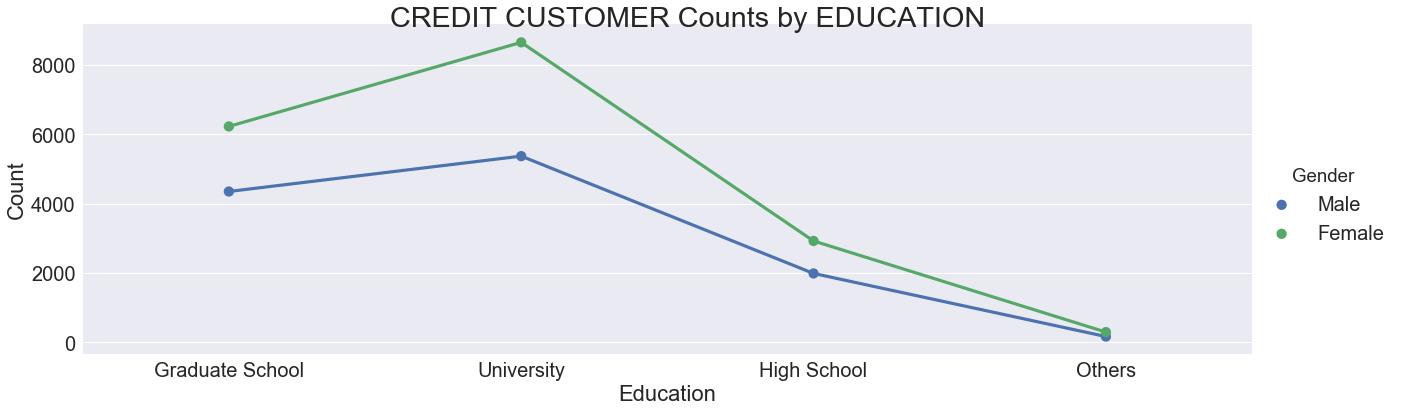

In [40]:
# Use saeborn to group by Gender and Education

def interpret_education(number):
    if number == 1:
        return 'Graduate School'
    elif number == 2:
        return 'University'
    elif number == 3:
        return 'High School'
    else:
        return 'Others'

df = pd.DataFrame(credit.groupby(['Gender', 'Education'])['Gender'].count())
df.columns = ['Count']
df.reset_index(inplace=True)  
df['Gender'] = df['Gender'].map(lambda number: 'Male' if number == 1 else 'Female')
df['Education'] = df['Education'].map(interpret_education)
dfGrouped = pd.DataFrame(df.groupby(['Gender', 'Education'])['Count'].sum())
dfGrouped.columns = ['Count']
# The reset_index is necessary for the graph to render
dfGrouped.reset_index(inplace=True)  
#dfGrouped.columns = ['Gender','Education','Count']
#dfGrouped

fg = sns.factorplot(data=dfGrouped, legend=True, x='Education', y='Count', hue='Gender', size=6, aspect=3)
fg.set_xlabels('Education')
fg.fig.suptitle('CREDIT CUSTOMER Counts by EDUCATION') 
plt.show()

## Bivariate Data Analysis

Bivariate analysis is used to find out if there is a relationship between two different variables. Something as simple as creating a scatterplot by plotting one variable against another on a Cartesian plane (think X and Y axis) can sometimes give you a picture of what the data is trying to tell you. If the data seems to fit a line or curve then there is a relationship or correlation between the two variables.  For example, one might choose to plot caloric intake versus weight.

### Default Analysis

In [41]:
# Non-Default/Default Counts
credit['DefaultFl'].value_counts().sort_index()

0    23364
1     6636
Name: DefaultFl, dtype: int64

### Total number of Customers who Defaulted

In [42]:
# Total number of customers out of 30,000 who defaulted
#credit.info()
defaultDF = credit[credit['DefaultFl']==1]
defaultDF.columns

len(defaultDF)

6636

### Breakdown of Default Customers by Gender

In [43]:
df = credit
df["Gender"] = df["Gender"].apply(lambda number: 'Male' if number == 1 else 'Female')

pd.crosstab(df.Gender, df.DefaultFl)

DefaultFl,0,1
Gender,,
Male,9015,2873
Female,14349,3763


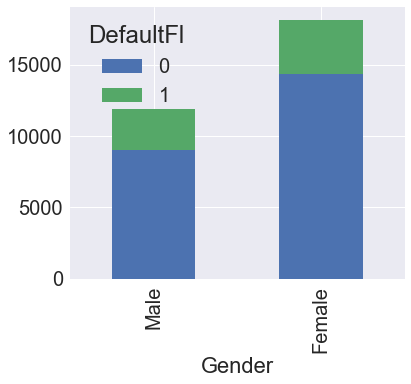

In [44]:
gender = pd.crosstab(df.Gender, df.DefaultFl)
gender.plot(kind='bar', stacked = True, figsize=(6,5))

### Breakdown of Default Customers by Marital Status

In [45]:
# Suspend the SettingWithCopy warning
pd.options.mode.chained_assignment = None  # default='warn'

df=credit

def interpret_marital(number):
    if number == 0:
        return 'Others'
    elif number == 1:
        return 'Married'
    elif number == 2:
        return 'Single'
    elif number == 3:
        return 'Divorce'
    
df['MaritalStatus'] = df['MaritalStatus'].apply(interpret_marital)
df.head()

,ID,LimitBalance,Gender,Education,MaritalStatus,Age,PastPay-1,PastPay-2,PastPay-3,PastPay-4,PastPay-5,PastPay-6,BillAmt-1,BillAmt-2,BillAmt-3,BillAmt-4,BillAmt-5,BillAmt-6,PayAmt-1,PayAmt-2,PayAmt-3,PayAmt-4,PayAmt-5,PayAmt-6,DefaultFl
0,1,20000,Female,2,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,2,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,2,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,2,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,2,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


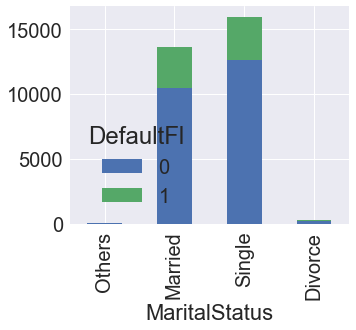

In [46]:
marital = pd.crosstab(df.MaritalStatus, df.DefaultFl)
marital.plot(kind='bar', stacked = True, figsize=(5,4))

### Breakdown of Default Customers by Education

In [47]:

def interpret_education(number):
    if number == 1:
        return 'Graduate School'
    elif number == 2:
        return 'University'
    elif number == 3:
        return 'High School'
    else:
        return 'Others'
    
df['Education'] = df['Education'].apply(interpret_education)
df.head()

,ID,LimitBalance,Gender,Education,MaritalStatus,Age,PastPay-1,PastPay-2,PastPay-3,PastPay-4,PastPay-5,PastPay-6,BillAmt-1,BillAmt-2,BillAmt-3,BillAmt-4,BillAmt-5,BillAmt-6,PayAmt-1,PayAmt-2,PayAmt-3,PayAmt-4,PayAmt-5,PayAmt-6,DefaultFl
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


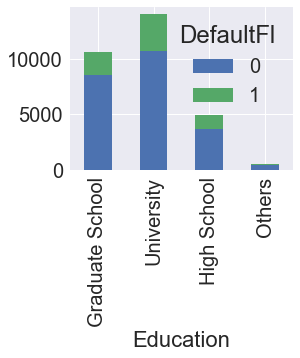

In [48]:
education = pd.crosstab(df.Education, df.DefaultFl)
education.plot(kind='bar', stacked = True, figsize=(4,3))

### Scatter Plot: Credit Given by Age

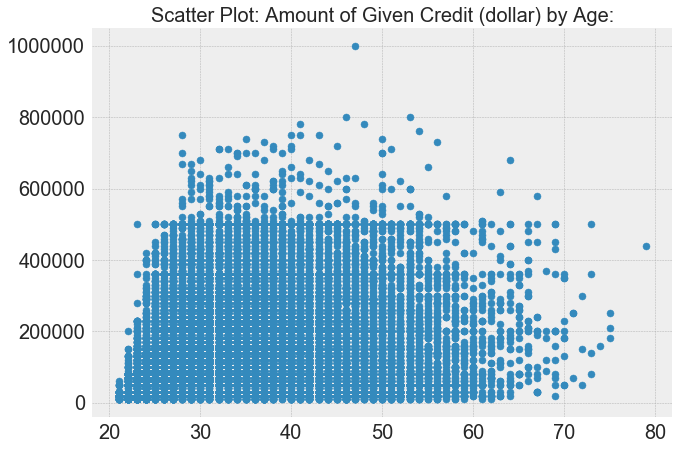

In [49]:
# create a scatter plot
plt.style.use('bmh')
x = credit['Age']
y = credit['LimitBalance']

plt.scatter(x,y)
plt.title('Scatter Plot: Amount of Given Credit (dollar) by Age:', fontsize=20)
plt.show()

### Breakdown of Customer Characteristics by Default (1) and No Default (0)

In [50]:
# Use of crosstab to show detailed number/customer characteristics for those who did and did not default
pd.crosstab(index=[credit.DefaultFl], columns=[credit.Gender,credit.MaritalStatus,credit.Education])

Gender                   Male                                                \
MaritalStatus          Others                                       Married   
Education     Graduate School University High School Others Graduate School   
DefaultFl                                                                     
0                           1          1          10      0            1300   
1                           0          0           2      0             390   

Gender                                                                  \
MaritalStatus                                        Single              
Education     University High School Others Graduate School University   
DefaultFl                                                                
0                   1727         745     72            2127       2194   
1                    643         303     10             506        746   

Gender                                                                   \
MaritalStatus                            Divorce                          
Education     High School Others Graduate School University High School   
DefaultFl                                                                 
0                     665     82              20         44          25   
1                     229      4              10         19          11   

Gender                        Female                                \
MaritalStatus                 Others                                 
Education     Others Graduate School University High School Others   
DefaultFl                                                            
0                  2               3          4          30      0   
1                  0               0          1           2      0   

Gender                                                                       \
MaritalStatus         Married                                        Single   
Education     Graduate School University High School Others Graduate School   
DefaultFl                                                                     
0                        1653       3449        1362    145            3428   
1                         379       1023         451      7             748   

Gender                                                                  \
MaritalStatus                                       Divorce              
Education     University High School Others Graduate School University   
DefaultFl                                                                
0                   3207         792    128              17         74   
1                    873         223     12               3         25   

Gender                            
MaritalStatus                     
Education     High School Others  
DefaultFl                         
0                      51      6  
1                      16      0

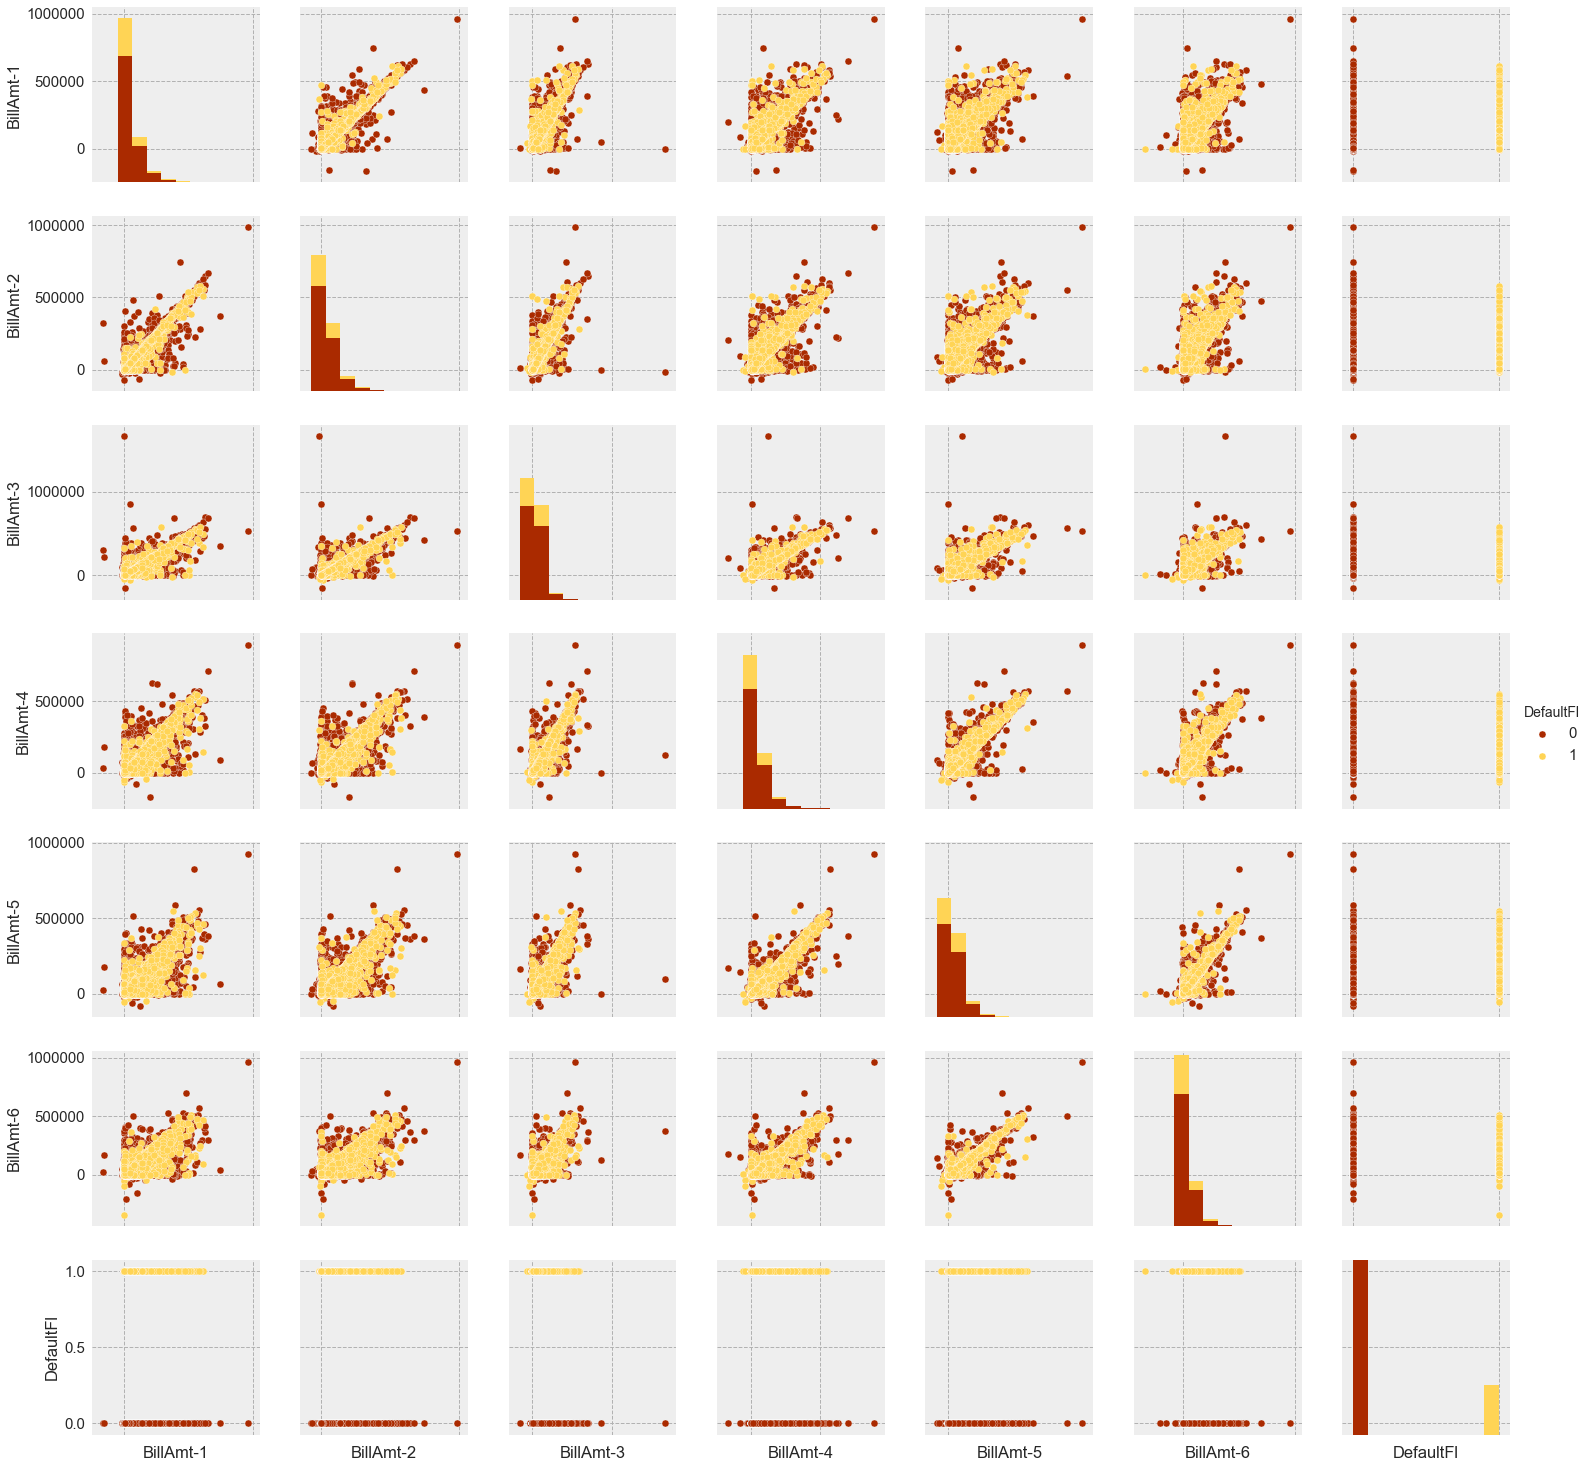

In [51]:
import seaborn as sns

with sns.plotting_context("notebook",font_scale=1.5):
     g = sns.pairplot(credit[['BillAmt-1','BillAmt-2','BillAmt-3','BillAmt-4','BillAmt-5','BillAmt-6','DefaultFl']], 
                      hue='DefaultFl', palette='afmhot', size=3)
g.set(xticklabels=[]);

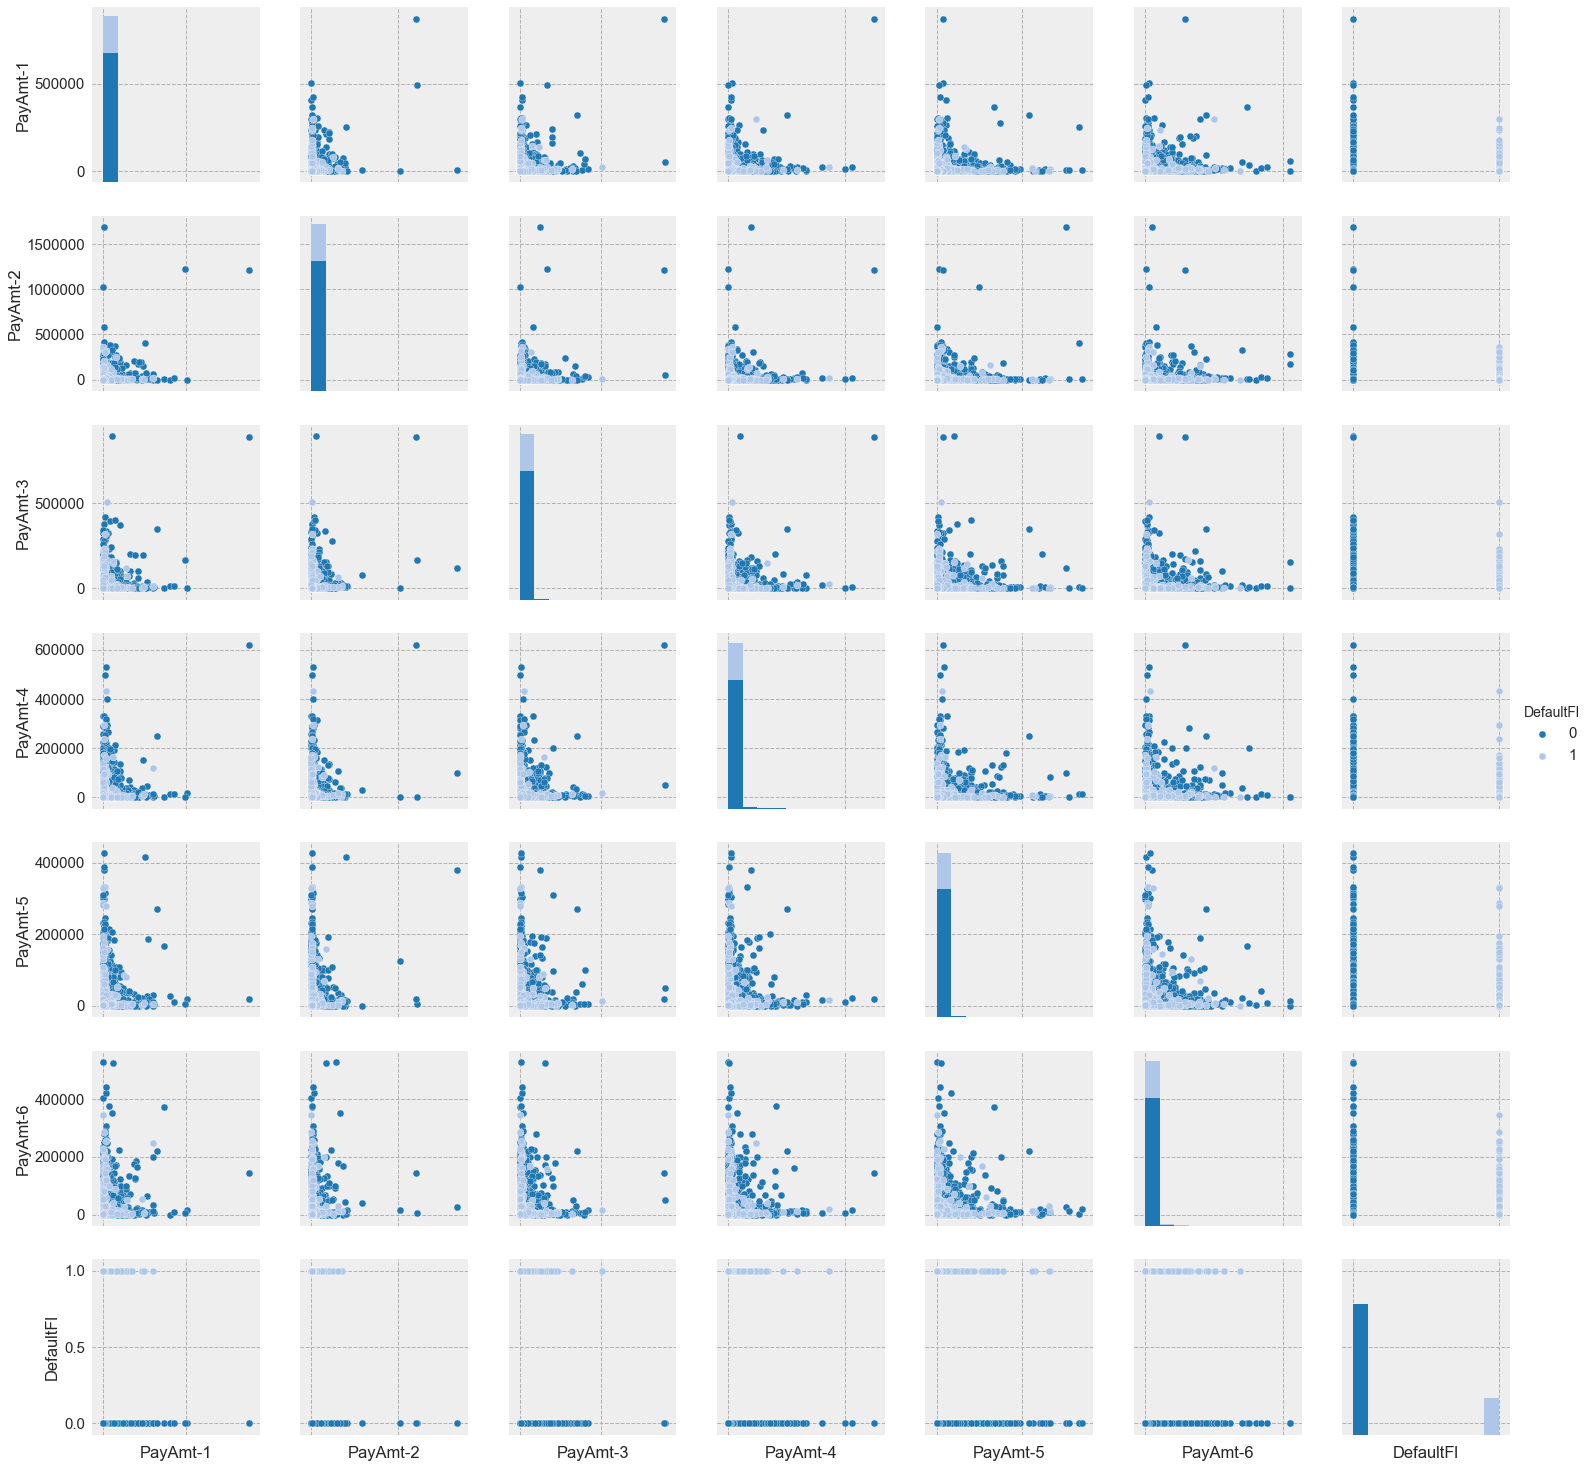

In [52]:
import seaborn as sns

with sns.plotting_context("notebook",font_scale=1.5):
     g = sns.pairplot(credit[['PayAmt-1','PayAmt-2','PayAmt-3','PayAmt-4','PayAmt-5','PayAmt-6','DefaultFl']], 
                      hue='DefaultFl', palette='tab20', size=3)
g.set(xticklabels=[]);

## Dummify Categorical Features

The categorical features are already numerically encoded in the dataset.  I don't think I
need to do any dummifying of the values.  However, since I changed the feature values for 
the sake of EDA to their meanings, I need to either change them back or just import the
original dataset into the regression and classification model building noteooks and
perform the data cleaning operations against the original dataset in the model building
that I found necessary in this effort.

In [53]:
# using LabelEncoder to dummify categorical features
#
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(credit['Gender'])
# list(le.classes_)
# 
# credit['Gender'] = le.transform(credit['Gender'# # ])

In [54]:
# Dummifying columns using panda's get_dummies method

# cols_to_transform = [ 'Gender','Education','MaritalStatus' ]
# df_with_dummies = pd.get_dummies(credit, columns = cols_to_transform )
# df_with_dummies.head()

In [55]:
# df_with_dummies.columns

#  Data Cleaning and Preparation

### Reload raw datafile

In [56]:
credit = pd.read_csv('default of credit card clients.csv', header =1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [57]:
credit.rename(columns={"LIMIT_BAL":"LimitBalance", "SEX":"Gender", 
                       "EDUCATION":"Education", "MARRIAGE":"MaritalStatus", "AGE":"Age", 
                       "PAY_0":"PastPay-1", "PAY_2":"PastPay-2", "PAY_3":"PastPay-3", 
                       "PAY_4":"PastPay-4", "PAY_5":"PastPay-5", "PAY_6":"PastPay-6",
                       "PAY_AMT1":"PayAmt-1", "PAY_AMT2":"PayAmt-2", "PAY_AMT3":"PayAmt-3", 
                       "PAY_AMT4":"PayAmt-4", "PAY_AMT5":"PayAmt-5", "PAY_AMT6":"PayAmt-6",
                       "BILL_AMT1":"BillAmt-1", "BILL_AMT2":"BillAmt-2", "BILL_AMT3":"BillAmt-3", 
                       "BILL_AMT4":"BillAmt-4", "BILL_AMT5":"BillAmt-5", "BILL_AMT6":"BillAmt-6",
                       "default payment next month":"DefaultFl"}, inplace=True)
credit.head()
credit.columns

Index(['ID', 'LimitBalance', 'Gender', 'Education', 'MaritalStatus', 'Age',
       'PastPay-1', 'PastPay-2', 'PastPay-3', 'PastPay-4', 'PastPay-5',
       'PastPay-6', 'BillAmt-1', 'BillAmt-2', 'BillAmt-3', 'BillAmt-4',
       'BillAmt-5', 'BillAmt-6', 'PayAmt-1', 'PayAmt-2', 'PayAmt-3',
       'PayAmt-4', 'PayAmt-5', 'PayAmt-6', 'DefaultFl'],
      dtype='object')

### Group Education values

In [58]:
filter_others = (credit.Education == 0) | (credit.Education == 5) | (credit.Education == 6)
credit.loc[filter_others, 'Education'] = 4
credit.Education.value_counts().sort_index()

1    10585
2    14030
3     4917
4      468
Name: Education, dtype: int64

### Feature Correlation and Covariance

In [59]:
# Correlation Matrix
corrMat = credit.corr()
print(corrMat)

                 ID  LimitBalance  Gender  Education  MaritalStatus   Age  \
ID             1.00          0.03    0.02       0.04          -0.03  0.02   
LimitBalance   0.03          1.00    0.02      -0.23          -0.11  0.14   
Gender         0.02          0.02    1.00       0.01          -0.03 -0.09   
Education      0.04         -0.23    0.01       1.00          -0.15  0.18   
MaritalStatus -0.03         -0.11   -0.03      -0.15           1.00 -0.41   
Age            0.02          0.14   -0.09       0.18          -0.41  1.00   
PastPay-1     -0.03         -0.27   -0.06       0.11           0.02 -0.04   
PastPay-2     -0.01         -0.30   -0.07       0.13           0.02 -0.05   
PastPay-3     -0.02         -0.29   -0.07       0.12           0.03 -0.05   
PastPay-4     -0.00         -0.27   -0.06       0.12           0.03 -0.05   
PastPay-5     -0.02         -0.25   -0.06       0.10           0.04 -0.05   
PastPay-6     -0.02         -0.24   -0.04       0.09           0.03 -0.05   

In [60]:
# Calculate the Covariance
covMat = credit.cov()
print(covMat)

                       ID   LimitBalance   Gender  Education  MaritalStatus  \
ID            75002500.00    29416640.92    78.36     242.81        -131.45   
LimitBalance  29416640.92 16834455682.16  1571.05  -22322.23       -7323.67   
Gender              78.36        1571.05     0.24       0.00          -0.01   
Education          242.81      -22322.23     0.00       0.55          -0.06   
MaritalStatus     -131.45       -7323.67    -0.01      -0.06           0.27   
Age               1491.06      173076.72    -0.41       1.25          -1.99   
PastPay-1         -297.57      -39545.93    -0.03       0.09           0.01   
PastPay-2         -116.28      -46037.65    -0.04       0.12           0.02   
PastPay-3         -191.69      -44432.25    -0.04       0.11           0.02   
PastPay-4          -27.69      -40571.81    -0.03       0.10           0.02   
PastPay-5         -217.86      -36670.56    -0.03       0.09           0.02   
PastPay-6         -201.88      -35093.08    -0.02   

### Remove ID and Highly Correlated Features 

In [61]:
# Remove high correlations: BillAmt-5, Gender_Female, Education_Graduate, MaritalStatus_Single

cols = ['LimitBalance', 'Gender', 'Education', 'MaritalStatus', 'Age', 
        'PastPay-1', 'PastPay-2', 'PastPay-3', 'PastPay-4', 'PastPay-5', 'PastPay-6', 
        'BillAmt-1', 
        'PayAmt-1','PayAmt-2', 'PayAmt-3', 'PayAmt-4', 'PayAmt-5', 'PayAmt-6', 
        'DefaultFl']
reorderedDF = credit.reindex(columns=cols)

In [62]:
reorderedDF.head()

,LimitBalance,Gender,Education,MaritalStatus,Age,PastPay-1,PastPay-2,PastPay-3,PastPay-4,PastPay-5,PastPay-6,BillAmt-1,PayAmt-1,PayAmt-2,PayAmt-3,PayAmt-4,PayAmt-5,PayAmt-6,DefaultFl
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


In [63]:
# Correlation Matrix
corrMat = reorderedDF.corr()
print(corrMat)

               LimitBalance  Gender  Education  MaritalStatus   Age  \
LimitBalance           1.00    0.02      -0.23          -0.11  0.14   
Gender                 0.02    1.00       0.01          -0.03 -0.09   
Education             -0.23    0.01       1.00          -0.15  0.18   
MaritalStatus         -0.11   -0.03      -0.15           1.00 -0.41   
Age                    0.14   -0.09       0.18          -0.41  1.00   
PastPay-1             -0.27   -0.06       0.11           0.02 -0.04   
PastPay-2             -0.30   -0.07       0.13           0.02 -0.05   
PastPay-3             -0.29   -0.07       0.12           0.03 -0.05   
PastPay-4             -0.27   -0.06       0.12           0.03 -0.05   
PastPay-5             -0.25   -0.06       0.10           0.04 -0.05   
PastPay-6             -0.24   -0.04       0.09           0.03 -0.05   
BillAmt-1              0.29   -0.03       0.02          -0.02  0.06   
PayAmt-1               0.20   -0.00      -0.04          -0.01  0.03   
PayAmt

### Export prepared data to file

In [64]:
# write prepared data to a new datafile
file_name = 'preparedData.csv'
reorderedDF.to_csv(file_name, sep=',', encoding='utf-8')

<font size="4"><center><b>Part 2, Model Development</b><br><br>

## Build the Classification Model

https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb

In [65]:
# imports packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Set pandas options

In [66]:
pd.set_option('display.max_columns', 500)
pd.set_option('precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [67]:
# data
rawData = pd.read_csv('preparedData.csv')
rawData.head()

,Unnamed: 0,LimitBalance,Gender,Education,MaritalStatus,Age,PastPay-1,PastPay-2,PastPay-3,PastPay-4,PastPay-5,PastPay-6,BillAmt-1,PayAmt-1,PayAmt-2,PayAmt-3,PayAmt-4,PayAmt-5,PayAmt-6,DefaultFl
0,0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679,0


In [68]:
rawData.columns

Index(['Unnamed: 0', 'LimitBalance', 'Gender', 'Education', 'MaritalStatus',
       'Age', 'PastPay-1', 'PastPay-2', 'PastPay-3', 'PastPay-4', 'PastPay-5',
       'PastPay-6', 'BillAmt-1', 'PayAmt-1', 'PayAmt-2', 'PayAmt-3',
       'PayAmt-4', 'PayAmt-5', 'PayAmt-6', 'DefaultFl'],
      dtype='object')

In [69]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
Unnamed: 0       30000 non-null int64
LimitBalance     30000 non-null int64
Gender           30000 non-null int64
Education        30000 non-null int64
MaritalStatus    30000 non-null int64
Age              30000 non-null int64
PastPay-1        30000 non-null int64
PastPay-2        30000 non-null int64
PastPay-3        30000 non-null int64
PastPay-4        30000 non-null int64
PastPay-5        30000 non-null int64
PastPay-6        30000 non-null int64
BillAmt-1        30000 non-null int64
PayAmt-1         30000 non-null int64
PayAmt-2         30000 non-null int64
PayAmt-3         30000 non-null int64
PayAmt-4         30000 non-null int64
PayAmt-5         30000 non-null int64
PayAmt-6         30000 non-null int64
DefaultFl        30000 non-null int64
dtypes: int64(20)
memory usage: 4.6 MB


In [70]:
# select features
features = rawData.iloc[:,1:19]

print('Summary of feature sample')
features.head()
features.columns

Summary of feature sample


Index(['LimitBalance', 'Gender', 'Education', 'MaritalStatus', 'Age',
       'PastPay-1', 'PastPay-2', 'PastPay-3', 'PastPay-4', 'PastPay-5',
       'PastPay-6', 'BillAmt-1', 'PayAmt-1', 'PayAmt-2', 'PayAmt-3',
       'PayAmt-4', 'PayAmt-5', 'PayAmt-6'],
      dtype='object')

In [71]:
# select dependent variable
depVar = rawData['DefaultFl']

### Establish the Train Set (X_train, y_train)

In [72]:
# establish Training Set data (first 1000 rows of Feature Space: X_train)
X_train = features[:1000]
X_train_count = len(X_train.index)
print('The number of observations in the X training set are:',str(X_train_count))
X_train.head()

The number of observations in the X training set are: 1000


,LimitBalance,Gender,Education,MaritalStatus,Age,PastPay-1,PastPay-2,PastPay-3,PastPay-4,PastPay-5,PastPay-6,BillAmt-1,PayAmt-1,PayAmt-2,PayAmt-3,PayAmt-4,PayAmt-5,PayAmt-6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,2000,36681,10000,9000,689,679


In [73]:
# establish Training Set dependent variable  (y_train)
y_train = depVar[:1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: DefaultFl, dtype: int64

### Establish the Test Set (X_test, y_test)

In [74]:
# establish Testing Set data (X_test)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       LimitBalance  Gender  Education  MaritalStatus  Age  PastPay-1  \
29900         20000       1          2              2   29          0   
29901         50000       1          2              2   29          1   
29902        170000       1          3              2   30          0   
29903        260000       1          1              1   30         -1   
29904         60000       1          3              2   30          0   

       PastPay-2  PastPay-3  PastPay-4  PastPay-5  PastPay-6  BillAmt-1  \
29900          0         -2         -2         -2         -2      16809   
29901          2          0          0          0          0      50845   
29902         -1          0          0          0          0      10392   
29903          0         -1         -1         -1         -1      27378   
29904          0          0          0          0          0      54952   

       PayAmt-1  PayAmt-2  PayAmt-3  PayAmt-4  P

In [75]:
# establish Ground Truth - i.e. Testing Set dependent variable (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: DefaultFl, dtype: int64

### Cross Validation

In [76]:
# model metrics
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split

# Optionally use KFold here instead of train_test_split
# from sklearn.model_selection import KFold
# k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [77]:
# implement cross validation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=10)
X_train.shape, X_test.shape

((700, 18), (300, 18))

#### Pass each trained model and the training sets to the function to obtain the training score.  The output values correspond to the the following:

* 1st value: The score array for test scores on each cv split. (Higher is an indicator of a better performing model)
* 2nd value: The time for fitting the estimator on the train set for each cv split.
* 3rd Value: The time for scoring the estimator on the test set for each cv split. 



# <span style="color:maroon"> Classification Model Builds</span>

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [79]:
# Used for displaying features/variable importance as well as for tree visualization
features=['LimitBalance', 'Gender', 'Education', 'MaritalStatus', 'Age',
          'PastPay-1', 'PastPay-2', 'PastPay-3', 'PastPay-4', 'PastPay-5',
          'PastPay-6', 'BillAmt-1', 'PayAmt-1', 'PayAmt-2', 'PayAmt-3',
          'PayAmt-4', 'PayAmt-5', 'PayAmt-6']
target=['true','false']

---
## <span style="color:blue"> K-Nearest Neighbor Classifier</span>

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (using the default parameters)
modelKNN = KNeighborsClassifier()

#### K-Nearest Neighbor Model Fitting and Scoring

In [81]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
print(cross_val_score(modelKNN, X_train, y_train))

[0.74 0.73 0.72]


In [83]:
modelKNN.score(X_train,y_train)

0.7942857142857143

### Tune the Model

In [84]:
# http://www.awesomestats.in/python-classification-advanced/
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

# example:
# https://github.com/kundajelab/av_scripts/blob/master/pwm/getPWMPerformance.py

In [85]:
tuned_parameters = [{'n_neighbors': [5,7,10],
                     'weights': ['uniform','distance']}]

In [86]:
modelKNN = KNeighborsClassifier()

In [87]:
clfKNN = GridSearchCV(modelKNN,
                      tuned_parameters,
                      cv=5,
                      n_jobs=2,
                      scoring='accuracy')

clfKNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'n_neighbors': [5, 7, 10], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [88]:
# http://www.awesomestats.in/python-classification-advanced/
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [89]:
print("Grid scores on development set:")
print()
means = clfKNN.cv_results_['mean_test_score']
stds = clfKNN.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clfKNN.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()


Grid scores on development set:

0.734 (+/-0.079) for {'n_neighbors': 5, 'weights': 'uniform'}
0.709 (+/-0.056) for {'n_neighbors': 5, 'weights': 'distance'}
0.740 (+/-0.051) for {'n_neighbors': 7, 'weights': 'uniform'}
0.729 (+/-0.035) for {'n_neighbors': 7, 'weights': 'distance'}
0.769 (+/-0.018) for {'n_neighbors': 10, 'weights': 'uniform'}
0.744 (+/-0.034) for {'n_neighbors': 10, 'weights': 'distance'}



In [90]:
print("Best parameters set found on development set:")
print()
print (clfKNN.best_params_)

Best parameters set found on development set:

{'n_neighbors': 10, 'weights': 'uniform'}


In [91]:
round(clfKNN.best_score_,4)

0.7686

#### Fit the model with optimized parameters

In [92]:
modelKNN = KNeighborsClassifier( n_neighbors = 10,
                                 weights = 'uniform')
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

---
## <span style="color:blue">Decision Tree Classifier</span>

In [93]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier;

# instantiate the model (using the default parameters)
modelDT = DecisionTreeClassifier()

#### Decision Tree Model Fitting and Default Model Scoring

In [94]:
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
print(cross_val_score(modelDT, X_train, y_train))

[0.74 0.69 0.69]


In [96]:
modelDT.score(X_train,y_train)

1.0

In [97]:
modelDT.feature_importances_

array([0.11, 0.00, 0.03, 0.02, 0.07, 0.13, 0.03, 0.03, 0.01, 0.04, 0.02,
       0.12, 0.08, 0.07, 0.06, 0.05, 0.06, 0.05])

In [98]:

# View a list of the features and their importance scores
list(zip(X_train[features], modelDT.feature_importances_))

[('LimitBalance', 0.11245014434425142),
 ('Gender', 0.004068868505795231),
 ('Education', 0.031859592683364184),
 ('MaritalStatus', 0.024065863182802467),
 ('Age', 0.0735603123078834),
 ('PastPay-1', 0.13430753071067003),
 ('PastPay-2', 0.026311135630007046),
 ('PastPay-3', 0.026327918656874474),
 ('PastPay-4', 0.014955649239001877),
 ('PastPay-5', 0.037793064522180196),
 ('PastPay-6', 0.021304313669953813),
 ('BillAmt-1', 0.11755050323057788),
 ('PayAmt-1', 0.08033420755984393),
 ('PayAmt-2', 0.07096910836435591),
 ('PayAmt-3', 0.05594154225041392),
 ('PayAmt-4', 0.05484520329809189),
 ('PayAmt-5', 0.06156702634836353),
 ('PayAmt-6', 0.051788015495568794)]

### Tune the Model

In [99]:
tuned_parameters = [{'max_depth': [5,10,15],
                     'max_features': [0.1,0.3,0.5,0.8]}]

In [100]:
modelDT = DecisionTreeClassifier()

In [101]:
clfDT = GridSearchCV(modelDT,
                     tuned_parameters,
                     cv=5,
                     n_jobs=2,
                     scoring='accuracy')

clfDT.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'max_depth': [5, 10, 15], 'max_features': [0.1, 0.3, 0.5, 0.8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [102]:
# http://www.awesomestats.in/python-classification-advanced/
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [103]:
print("Grid scores on development set:")
print()
means = clfDT.cv_results_['mean_test_score']
stds = clfDT.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clfDT.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()


Grid scores on development set:

0.761 (+/-0.020) for {'max_depth': 5, 'max_features': 0.1}
0.761 (+/-0.045) for {'max_depth': 5, 'max_features': 0.3}
0.751 (+/-0.058) for {'max_depth': 5, 'max_features': 0.5}
0.754 (+/-0.030) for {'max_depth': 5, 'max_features': 0.8}
0.741 (+/-0.101) for {'max_depth': 10, 'max_features': 0.1}
0.709 (+/-0.054) for {'max_depth': 10, 'max_features': 0.3}
0.719 (+/-0.060) for {'max_depth': 10, 'max_features': 0.5}
0.761 (+/-0.054) for {'max_depth': 10, 'max_features': 0.8}
0.719 (+/-0.052) for {'max_depth': 15, 'max_features': 0.1}
0.709 (+/-0.068) for {'max_depth': 15, 'max_features': 0.3}
0.680 (+/-0.041) for {'max_depth': 15, 'max_features': 0.5}
0.686 (+/-0.057) for {'max_depth': 15, 'max_features': 0.8}



In [104]:
print("Best parameters set found on development set:")
print()
print (clfDT.best_params_)

Best parameters set found on development set:

{'max_depth': 5, 'max_features': 0.1}


In [105]:
round(clfDT.best_score_,4)

0.7614

#### Fit the model with optimized parameters

In [106]:
modelDT = DecisionTreeClassifier( max_depth = 5,
                                  max_features = 0.8)
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Decision Tree Visualizing

In [107]:
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
import io

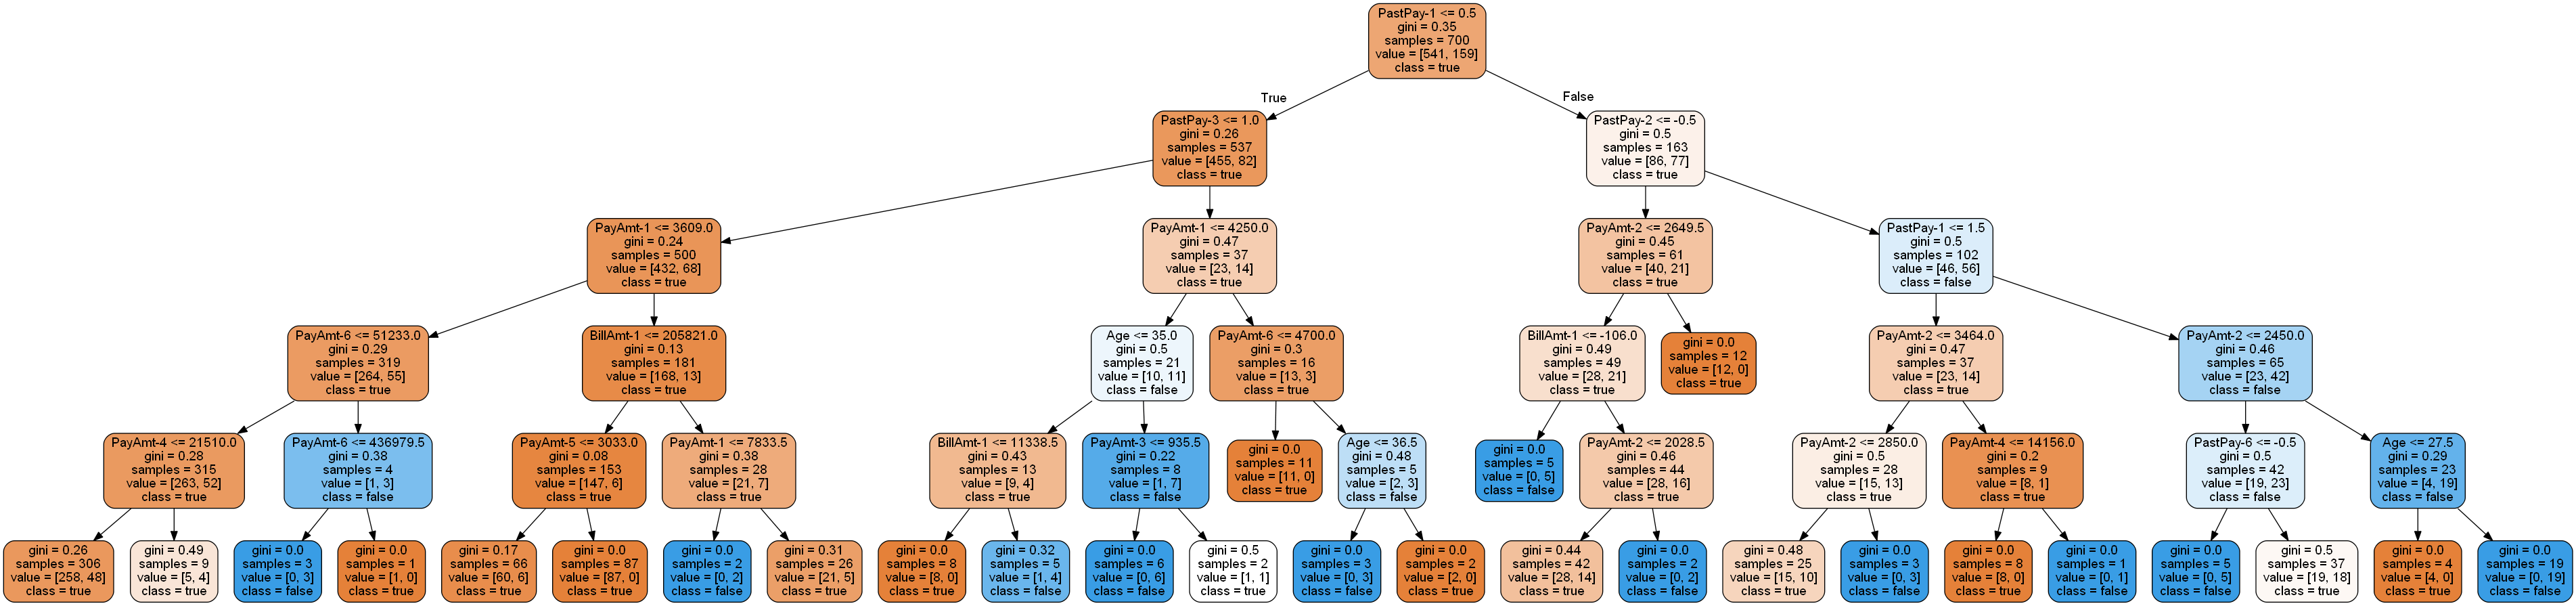

In [108]:
dot_data = io.StringIO()
tree.export_graphviz(
      modelDT, 
      feature_names=features,
      class_names=target,
      out_file=dot_data,
      label='all',
      precision = 2,
      filled=True,
      rounded=True)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in path
Image(graph.create_png())

In [109]:
graph.write_pdf('DecisionTree.pdf')

True

---
## <span style="color:blue"> Random Forest Classifier</span>

In [110]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the model (using the default parameters)
modelRF = RandomForestClassifier()

#### Random Forest Model Fitting and Default Model Scoring

In [111]:
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
print(cross_val_score(modelRF, X_train, y_train))

[0.77 0.75 0.76]


In [113]:
modelRF.score(X_train,y_train)

0.98

#### Variable Importance

In [114]:
modelRF.feature_importances_

array([0.09, 0.02, 0.03, 0.02, 0.09, 0.08, 0.04, 0.05, 0.03, 0.02, 0.02,
       0.09, 0.07, 0.08, 0.07, 0.07, 0.07, 0.06])

In [115]:
# View a list of the features and their importance scores
list(zip(X_train[features], modelRF.feature_importances_))

[('LimitBalance', 0.09292749036609049),
 ('Gender', 0.016438705355379602),
 ('Education', 0.030673030800467148),
 ('MaritalStatus', 0.023710044255242136),
 ('Age', 0.09462783220938109),
 ('PastPay-1', 0.07975643340421276),
 ('PastPay-2', 0.03942481020417299),
 ('PastPay-3', 0.04910217306777549),
 ('PastPay-4', 0.03337520635183254),
 ('PastPay-5', 0.019447565515032496),
 ('PastPay-6', 0.019992845476829987),
 ('BillAmt-1', 0.08781504531865253),
 ('PayAmt-1', 0.07329116605928339),
 ('PayAmt-2', 0.07731899263811146),
 ('PayAmt-3', 0.06548438261272944),
 ('PayAmt-4', 0.06800568156333184),
 ('PayAmt-5', 0.06531869743272536),
 ('PayAmt-6', 0.06328989736874926)]

### Tune the Model

In [116]:
# Explanation of tuning parameters:
# https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
# Gradient Boosting: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/


In [117]:
tuned_parameters = [{'max_depth': [5,10,15],
                     'n_estimators': [10,50,100],
                     'max_features': [0.1,0.3,0.5]}]

In [118]:
modelRF = RandomForestClassifier()

In [119]:
clfRF = GridSearchCV(modelRF,
                     tuned_parameters,
                     cv=5,
                     n_jobs=2,
                     scoring='accuracy')

clfRF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'max_depth': [5, 10, 15], 'n_estimators': [10, 50, 100], 'max_features': [0.1, 0.3, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [120]:
# http://www.awesomestats.in/python-classification-advanced/
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [121]:
print("Grid scores on development set:")
print()
means = clfRF.cv_results_['mean_test_score']
stds = clfRF.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clfRF.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()


Grid scores on development set:

0.769 (+/-0.028) for {'max_depth': 5, 'max_features': 0.1, 'n_estimators': 10}
0.781 (+/-0.022) for {'max_depth': 5, 'max_features': 0.1, 'n_estimators': 50}
0.777 (+/-0.017) for {'max_depth': 5, 'max_features': 0.1, 'n_estimators': 100}
0.779 (+/-0.032) for {'max_depth': 5, 'max_features': 0.3, 'n_estimators': 10}
0.773 (+/-0.023) for {'max_depth': 5, 'max_features': 0.3, 'n_estimators': 50}
0.780 (+/-0.023) for {'max_depth': 5, 'max_features': 0.3, 'n_estimators': 100}
0.767 (+/-0.030) for {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 10}
0.769 (+/-0.022) for {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 50}
0.769 (+/-0.027) for {'max_depth': 5, 'max_features': 0.5, 'n_estimators': 100}
0.767 (+/-0.039) for {'max_depth': 10, 'max_features': 0.1, 'n_estimators': 10}
0.774 (+/-0.027) for {'max_depth': 10, 'max_features': 0.1, 'n_estimators': 50}
0.776 (+/-0.026) for {'max_depth': 10, 'max_features': 0.1, 'n_estimators': 100}
0.767 (+/-0.

In [122]:
print("Best parameters set found on development set:")
print()
print (clfRF.best_params_)

Best parameters set found on development set:

{'max_depth': 5, 'max_features': 0.1, 'n_estimators': 50}


In [123]:
round(clfRF.best_score_,4)

0.7814

#### Fit the model with optimized parameters

In [124]:
modelRF = RandomForestClassifier( max_depth = 5,
                                  max_features = 0.3,
                                  n_estimators = 100)
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Random Forest Tree Visualization

In [125]:
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
import io

In [126]:
estimator = modelRF.estimators_[5]

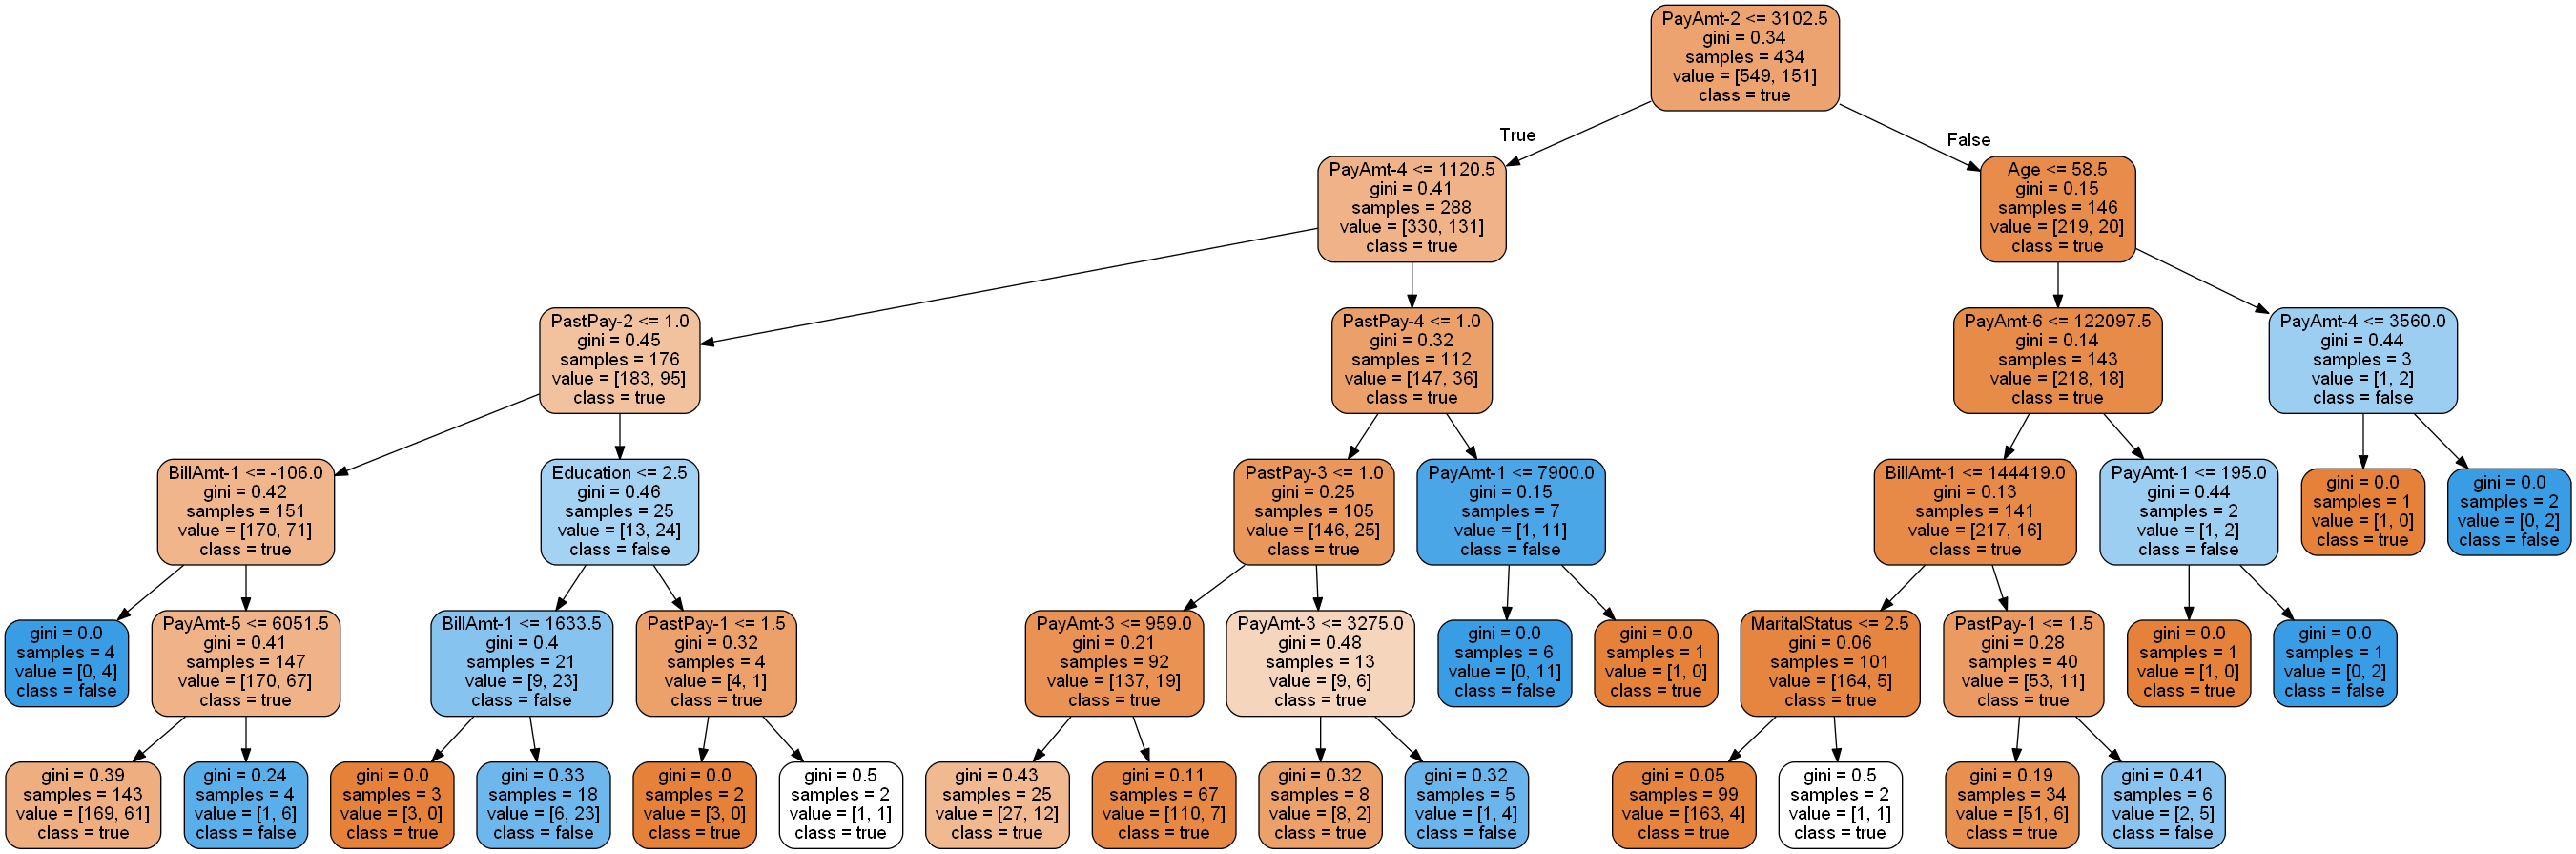

In [127]:
dot_data = io.StringIO()
tree.export_graphviz(
      estimator, 
      feature_names=features,
      class_names=target,
      out_file=dot_data,
      label='all',
      precision = 2,
      filled=True,
      rounded=True)

graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in path
Image(graph.create_png())

In [128]:
graph.write_pdf('RandomForest.pdf')

True

---
## <span style="color:blue"> Logistic Regression Classifier</span>

In [129]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
modelLR = LogisticRegression()

#### Logistic Regression Model Fitting and Default Model Scoring

In [130]:
modelLR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [131]:
print(cross_val_score(modelLR, X_train, y_train))

[0.76 0.77 0.78]


In [132]:
modelLR.score(X_train,y_train)

0.7742857142857142

### Tune the Model

In [133]:
tuned_parameters = [{'solver': ['liblinear', 'sag', 'saga']}]

In [134]:
modelLR = LogisticRegression()

In [135]:
clfLR = GridSearchCV(modelLR,
                     tuned_parameters,
                     cv=5,
                     n_jobs=2,
                     scoring='accuracy')

clfLR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'solver': ['liblinear', 'sag', 'saga']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [136]:
# http://www.awesomestats.in/python-classification-advanced/
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

In [137]:
print("Grid scores on development set:")
print()
means = clfLR.cv_results_['mean_test_score']
stds = clfLR.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clfLR.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
           % (mean, std * 2, params))
print()


Grid scores on development set:

0.771 (+/-0.017) for {'solver': 'liblinear'}
0.774 (+/-0.010) for {'solver': 'sag'}
0.774 (+/-0.010) for {'solver': 'saga'}



In [138]:
print("Best parameters set found on development set:")
print()
print (clfLR.best_params_)

Best parameters set found on development set:

{'solver': 'sag'}


In [139]:
round(clfLR.best_score_,4)

0.7743

#### Fit the model with optimized parameters

In [140]:
modelLR = LogisticRegression( solver = 'sag')
modelLR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

---
## <span style="color:blue"> Gaussian Classifier </span>

In [141]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model (using the default parameters)
modelGNB = GaussianNB()

#### Gaussian Model Fitting and Default Model Scoring

In [142]:
modelGNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [143]:
print(cross_val_score(modelGNB, X_train, y_train))

[0.34 0.35 0.65]


In [144]:
modelGNB.score(X_train,y_train)

0.3757142857142857

---
# <span style="color:maroon"> Predictions</span>

In [145]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from math import sqrt

#### K-Nearest Neighbor Predictions

In [146]:
# predict the response values for the observations in X
y_pred = modelKNN.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8066666666666666


In [147]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[242   3]
 [ 55   0]]

             precision    recall  f1-score   support

          0       0.81      0.99      0.89       245
          1       0.00      0.00      0.00        55

avg / total       0.67      0.81      0.73       300



#### Decision Tree Predictions

In [148]:
# predict the response values for the observations in X
y_pred = modelDT.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8066666666666666


In [149]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[236   9]
 [ 49   6]]

             precision    recall  f1-score   support

          0       0.83      0.96      0.89       245
          1       0.40      0.11      0.17        55

avg / total       0.75      0.81      0.76       300



####  Random Forest Predictions

In [150]:
# predict the response values for the observations in X
y_pred = modelRF.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8233333333333334


In [151]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[235  10]
 [ 43  12]]

             precision    recall  f1-score   support

          0       0.85      0.96      0.90       245
          1       0.55      0.22      0.31        55

avg / total       0.79      0.82      0.79       300



#### Linear Regression Predictions

In [152]:
# predict the response values for the observations in X
y_pred = modelLR.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7966666666666666


In [153]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[239   6]
 [ 55   0]]

             precision    recall  f1-score   support

          0       0.81      0.98      0.89       245
          1       0.00      0.00      0.00        55

avg / total       0.66      0.80      0.72       300



#### Gaussian Predictions

In [154]:
# predict the response values for the observations in X
y_pred = modelGNB.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.38666666666666666


In [155]:
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[ 63 182]
 [  2  53]]

             precision    recall  f1-score   support

          0       0.97      0.26      0.41       245
          1       0.23      0.96      0.37        55

avg / total       0.83      0.39      0.40       300

